<a href="https://colab.research.google.com/github/ajipermadi15/triangle_classification/blob/main/Triangle_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Akhmad Aji Permadi <br>
NIM  : 10118030

#Triangle Problems

Pada bagian ini, akan dibuat klasifikasi untuk segitiga berdasarkan jenis sisi dan sudutnya dengan input parameter berupa (sisi_1, sisi_2, sisi_3). Pertama-tama yang dilakukan di sini adalah pembuatan dataset yang terdiri dari kombinasi nilai bilangan bulat untuk sisi-sisi segitiga sebagai $X$ dan jenis sisi serta sudutnya sebagai label ($y$). <br> <br>
Adapun untuk tipe sisinya terdiri dari tiga jenis, yaitu:
```
0 : Equilateral Triangle (3 equal sides)
1 : Isosceles Triangle (2 equal sides)
2 : Scalene Triangle (no equal sides)
```
Dan untuk tipe sudutnya terdiri dari empat jenis, yaitu:
```
0 : Right Triangle (1 angle = 90°)
1 : Acute Triangle (3 angles < 90°)
2 : Obtuse Triangle (1 angle > 90°)
3 : Equiangular Triangle (3 angles = 60°)
```
Selanjutnya, terlebih dahulu akan dibuat dataset menggunakan kode dari Pak Mursito (author) dengan dilakukan sedikit modifikasi untuk penyesuaian.



In [ ]:
#@title triangle.py (with modification)
# -*- coding: utf-8 -*-
"""
Created on Sun Sep  2 02:44:37 2018

@author: Mursito
"""
import random as rd
import numpy as np

max_side = 20

def side_types():
    return ["equilateral","isosceles","scalene"]

def angle_types():
    return ["right","acute","obtuse","equiangular"]

def parameters():
    return ["side1", "side2", "side3"]

def equilateral_triangle():
    side1=rd.randint(1,max_side)
    return [side1, side1, side1]

def isosceles_triangle():
    side1=rd.randint(1,max_side)
    side2=rd.randint(1,max_side)
    t = [side1, side1, side2]
    rd.shuffle(t)
    return t

# membuat segitiga siku-siku
# namun bilangan bulat dan sisi<20
def right_triangle():
    rt3 = [[3,4,5],[6,8,10],[5,12,13],[9,12,15]]
    t = list(rd.choice(rt3))
    rd.shuffle(t)
    return t

def scalene_triangle():
    side1=rd.randint(1,max_side)
    side2=rd.randint(1,max_side)
    side3=rd.randint(1,max_side)
    return [side1, side2, side3]

def type_by_side(tr):
    t3=list(tr)
    t3.sort()
    if (t3[0] == t3[1] == t3[2]):
        return 0
    elif (t3[0] == t3[1]) or (t3[1] == t3[2]):
        return 1
    else:
        return 2

def type_by_angle(tr):
    if len(set(tr)) == 1:
        return 3
    else:
        t3=list(tr)
        t3.sort()
        s1 = t3[0]*t3[0] + t3[1]*t3[1]
        s2 = t3[2]*t3[2]
        if (s1 > s2):
            return 1
        elif (s1 < s2):
            return 2
        else:
            return 0

def perimeter(tr):
    return tr[0]+tr[1]+tr[3]

def area(tr):
    s=perimeter(tr)/2
    return np.sqrt(s*(s-tr[0])*(s-tr[1])*(s-tr[2]))


def triangle():
    t = rd.randint(1,6)
    if t<=1:
        tr = equilateral_triangle()
    elif t<=3:
        tr = isosceles_triangle()
    elif t<5:
        tr = right_triangle()
    else:
        tr = scalene_triangle()

    ts = type_by_side(tr)
    ta = type_by_angle(tr)

    return ta, ts, tr

TRAINING:
[tside, tangle] => [side1, side2, side3]
[2, 1] => [16. 19. 13.]
[1, 2] => [ 3. 13.  3.]
[1, 1] => [20. 16. 20.]
[2, 2] => [ 7. 13.  4.]
[0, 3] => [10. 10. 10.]
[2, 0] => [ 9. 12. 15.]
[1, 1] => [5. 5. 6.]
[1, 1] => [20. 20.  8.]
[1, 1] => [19. 19.  4.]
[2, 1] => [12. 14. 11.]
[1, 2] => [ 2. 18.  2.]
[1, 2] => [11. 11. 17.]
[0, 3] => [15. 15. 15.]
[0, 3] => [20. 20. 20.]
[2, 2] => [ 6.  9. 16.]
[2, 0] => [12.  9. 15.]
[2, 2] => [18. 10. 14.]
[1, 2] => [2. 2. 5.]
[2, 0] => [ 6. 10.  8.]
[1, 1] => [20. 18. 20.]
[0, 3] => [11. 11. 11.]
[2, 2] => [12. 14.  5.]
[2, 2] => [13. 12.  2.]
[1, 1] => [ 6. 19. 19.]
[1, 1] => [16. 15. 16.]
[1, 1] => [12.  9. 12.]
[2, 2] => [18. 15.  2.]
[0, 3] => [15. 15. 15.]
[1, 2] => [13. 13. 19.]
[2, 2] => [20.  9. 12.]
[0, 3] => [6. 6. 6.]
[1, 1] => [19. 14. 19.]
[2, 0] => [ 8.  6. 10.]
[0, 3] => [11. 11. 11.]
[2, 0] => [5. 4. 3.]
[1, 1] => [16. 20. 20.]
[1, 1] => [ 2. 19. 19.]
[1, 1] => [10. 10.  5.]
[2, 2] => [ 4. 20.  3.]
[1, 1] => [ 3. 15. 15.]
[

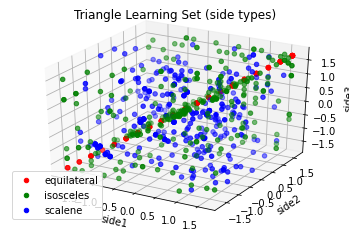

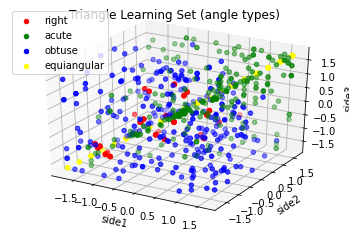

In [ ]:
#@title C-11-triangle.py (with modification)
# -*- coding: utf-8 -*-
"""
Created on Sun Sep  2 02:44:37 2018

@author: Mursito
"""

import sklearn as sk
import matplotlib.pyplot as plt
#import triangle as s3

# Get dataset of triangles
X=[]
y=[]
for i in range(1000):
    tangle, tside, tr = triangle()
    X.append(tr)
    y.append([tside, tangle])

labels=parameters()


# Pisahkan data menjadi training dan testing set
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Print the training data
print("TRAINING:")
print("[tside, tangle] => [side1, side2, side3]")
for i in range(len(X_train)):
    #print(y_train[i], "=>", scaler.inverse_transform([X_train[i]])[0])
    print(y_train[i], "=>", scaler.inverse_transform(X_train[i].reshape(-1,3))[0])

# Draw graphics in 3 Dimension
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Based on its sides
colors = ['red', 'green', 'blue']
legends=side_types()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lj = len(y_train)

for i in range(len(colors)):
    xs = [ X_train[j,0] for j in range(lj) if y_train[j][0]==i ]
    ys = [ X_train[j,1] for j in range(lj) if y_train[j][0]==i ]
    zs = [ X_train[j,2] for j in range(lj) if y_train[j][0]==i ]
    ax.scatter(xs, ys, zs, c=colors[i], marker='o')

ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
plt.legend(legends)
plt.title("Triangle Learning Set (side types)")
plt.show()

# Based on its angles
colors = ['red', 'green', 'blue', 'yellow']
legends=angle_types()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lj = len(y_train)

for i in range(len(colors)):
    xs = [ X_train[j,0] for j in range(lj) if y_train[j][1]==i ]
    ys = [ X_train[j,1] for j in range(lj) if y_train[j][1]==i ]
    zs = [ X_train[j,2] for j in range(lj) if y_train[j][1]==i ]
    ax.scatter(xs, ys, zs, c=colors[i], marker='o')

ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
plt.legend(legends)
plt.title("Triangle Learning Set (angle types)")
plt.show()

In [ ]:
#@title New labelling

label_dictionary = {0: [0,3],
                    1: [1,0],
                    2: [1,1],
                    3: [1,2],
                    4: [2,0],
                    5: [2,1],
                    6: [2,2]}

def new_label(y, label_dictionary):
    new_y = []
    for label in y:
        new_label = list(label_dictionary.keys())[list(label_dictionary.values()).index(label)]
        new_y.append(new_label)
    return new_y

y_train = new_label(y_train, label_dictionary)
y_test = new_label(y_test, label_dictionary)

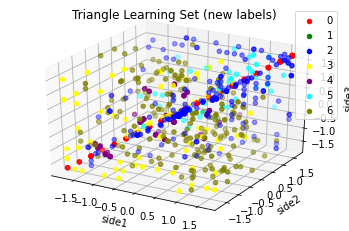

In [ ]:
#@title Plot Triangle Learning Set with New Labels

colors = ['red', 'green', 'blue', 'yellow', 'purple', 'cyan', 'olive']
legends=list(label_dictionary.keys())
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lj = len(y_train)

for i in range(len(colors)):
    xs = [ X_train[j,0] for j in range(lj) if y_train[j]==i ]
    ys = [ X_train[j,1] for j in range(lj) if y_train[j]==i ]
    zs = [ X_train[j,2] for j in range(lj) if y_train[j]==i ]
    ax.scatter(xs, ys, zs, c=colors[i], marker='o')

ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
plt.legend(legends)
plt.title("Triangle Learning Set (new labels)")
plt.show()

TESTING:
3 == [19.  2.  2.]
2 == [ 4. 11. 11.]
0 == [12. 12. 12.]
0 == [19. 19. 19.]
5 == [12. 15. 16.]
2 == [13. 13.  2.]
6 == [ 4.  8. 12.]
6 == [ 5. 13.  1.]
4 == [ 8.  6. 10.]
6 == [11.  6. 18.]
4 == [ 8. 10.  6.]
4 == [15. 12.  9.]
4 == [ 5. 13. 12.]
2 == [10. 10.  1.]
0 == [12. 12. 12.]
5 == [16. 19. 18.]
0 == [10. 10. 10.]
0 == [11. 11. 11.]
6 == [ 5. 19.  3.]
3 == [ 4. 11.  4.]
2 == [15. 11. 11.]
5 <> [14. 16. 14.]
4 == [5. 4. 3.]
3 == [1. 4. 1.]
6 == [ 1. 13.  3.]
4 == [15.  9. 12.]
2 == [16.  7. 16.]
4 == [5. 3. 4.]
0 == [16. 16. 16.]
4 == [ 8.  6. 10.]
2 == [ 8.  8. 10.]
0 == [15. 15. 15.]
2 == [20. 20.  7.]
5 <> [15. 17. 15.]
4 == [10.  8.  6.]
3 == [ 6. 20.  6.]
6 == [19. 10.  7.]
0 == [2. 2. 2.]
2 == [12. 10. 10.]
6 == [11.  6.  8.]
3 == [3. 3. 5.]
4 == [ 5. 13. 12.]
2 == [9. 2. 9.]
4 == [ 8.  6. 10.]
0 == [20. 20. 20.]
6 == [12.  4. 16.]
5 == [13. 19. 17.]
3 == [2. 2. 9.]
2 == [1. 4. 4.]
6 == [17. 19.  1.]
4 == [13. 12.  5.]
4 == [15.  9. 12.]
3 == [12.  2.  2.]
4 == [12

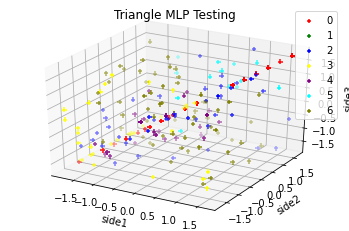

In [ ]:
#@title Training Model
# -*- coding: utf-8 -*-
"""
From Learning scikit-learn: Machine Learning in Python
MUST BE RUN AFTER C-11-triangle
"""

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30,30,30),
    activation='relu', # {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
    solver='lbfgs',        # {‘lbfgs’, ‘sgd’, ‘adam’}
    learning_rate='invscaling', # {‘constant’, ‘invscaling’, ‘adaptive’}
    max_iter=10000,
    momentum=0.9,
    random_state=0)

mlp.fit(X_train,y_train)

y_mlp = mlp.predict(X_test)

print("TESTING:")
for i in range(len(X_test)):
    if (y_mlp[i] == y_test[i]):
        print(y_mlp[i], "==", scaler.inverse_transform(X_test[i].reshape(-1,3))[0])
    else:
        print(y_mlp[i], "<>", scaler.inverse_transform(X_test[i].reshape(-1,3))[0])

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_mlp))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lj = len(y_train)

for i in range(len(colors)):
    xs = X_test[:, 0][y_mlp == i]
    ys = X_test[:, 1][y_mlp == i]
    zs = X_test[:, 2][y_mlp == i]
    ax.scatter(xs, ys, zs, c=colors[i], marker='+')

ax.set_xlabel(labels[0])
ax.set_ylabel(labels[1])
ax.set_zlabel(labels[2])
plt.legend(legends)
plt.title("Triangle MLP Testing")
plt.show()

#Signal Response

Pada bagian ini, akan dibuat klasifikasi untuk sinyal respon step sistem orde dua dengan input parameter berupa 100 step sinyal. Pertama-tama yang dilakukan di sini adalah pembuatan dataset yang terdiri dari 100 step sinyal sebagai $X$ dan jenis sinyal respon sebagai label ($y$). <br> <br>
Adapun untuk tipe sinyal respon terdiri dari empat jenis, yaitu:
```
0 : Undamped
1 : Underdamped
2 : Critically-damped
3 : Overdamped
```
Selanjutnya, terlebih dahulu akan dibuat dataset menggunakan kode dari Pak Mursito (author) dengan dilakukan sedikit modifikasi untuk penyesuaian.

In [ ]:
#@title orde2.py

import random as rd
from scipy.signal import lti, step2

tstep = []
tstep.extend(range(100))

def step_(psi=1, wn=10):
    a0 = 1.0
    a1 = (2.0 * psi) / wn
    a2 = 1.0 / (wn * wn)
    b0 = 1.0

    sys = lti([b0], [a0, a1, a2])
    return step2(sys, T=tstep)

def respond_types():
    return ["undamped", "underdamped","critically-damped","overdamped"]

def parameters():
    return ["time", "signal"]

def step():
    wn = (rd.random()/5) +0.9
    t = rd.randint(0,100)
    if t < 5:
        psi = 0
        d = 0
    elif t < 50:
        psi = rd.random()
        d = 1
    elif t < 60:
        psi = 1.0
        d = 2
    else:
        psi = (1 + rd.random()*2)
        psi = psi * psi
        d = 3

    t,y = step_(psi=psi, wn=wn)
    return d, t, y

TRAINING SET:
undamped = 37
underdamped = 330
critically-damped = 76
overdamped = 307


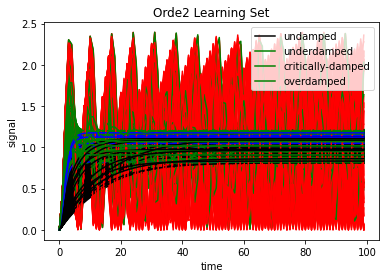

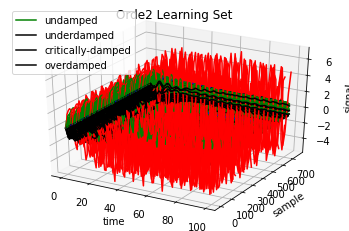

In [ ]:
#@title C-21-orde2.py (with modification)
# -*- coding: utf-8 -*-
"""
Created on Sun Sep  2 02:44:37 2018

@author: Mursito
"""

import sklearn as sk
import matplotlib.pyplot as plt
#import orde2 as orde2

# Get dataset of triangles
X=[]
y=[]
for i in range(1000):
    rtype, t, signal = step()
    X.append(signal)
    y.append(rtype)

legends=respond_types()
labels=parameters()

# Pisahkan data menjadi training dan testing set
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split the dataset into a training and a testing set
# Test set will be the 25% taken randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

# Standardize the features
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Print the training data
print("TRAINING SET:")
ctype=[0,0,0,0]
for i in range(len(y_train)):
    ctype[y_train[i]] += 1

for i in range(len(ctype)):
    print(legends[i], "=", ctype[i])

# Draw graphics in 3 Dimension
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

colors = ['red', 'green', 'blue', "black"]

lenx = len(X_train[0])
ys = [0]*lenx
xs = []
xs.extend(range(lenx))

for i in range(len(X)):
    zs = X[i]
    plt.plot(xs, zs, c=colors[y[i]])

plt.xlabel(labels[0])
plt.ylabel(labels[1])
plt.legend(legends)
plt.title("Orde2 Learning Set")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lenx = len(X_train[0])

ys = [0]*lenx
xs = []
xs.extend(range(lenx))

for i in range(len(X_train)):
    zs = X_train[i]
    ys = [e+1 for e in ys]
    ax.plot(xs, ys, zs, c=colors[y_train[i]])

ax.set_ylabel("sample")
ax.set_xlabel(labels[0])
ax.set_zlabel(labels[1])
plt.legend(legends)
plt.title("Orde2 Learning Set")
plt.show()

In [ ]:
#@title Test Dataset Classes Information
c_type=[0,0,0,0]
for i in range(len(y_test)):
    c_type[y_test[i]] += 1

for i in range(len(c_type)):
    print(legends[i], "=", c_type[i])

undamped = 16
underdamped = 105
critically-damped = 33
overdamped = 96


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.95      0.98       105
           2       0.87      1.00      0.93        33
           3       1.00      0.99      0.99        96

    accuracy                           0.98       250
   macro avg       0.95      0.99      0.97       250
weighted avg       0.98      0.98      0.98       250



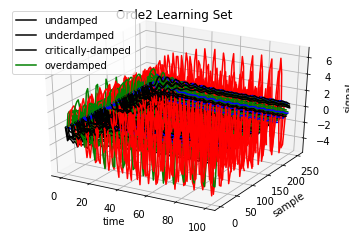

In [ ]:
#@title Training Model
# -*- coding: utf-8 -*-
"""
From Learning scikit-learn: Machine Learning in Python
MUST BE RUN AFTER C-11-triangle
"""

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30),
    activation='identity', # {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
    solver='adam',        # {‘lbfgs’, ‘sgd’, ‘adam’}
    learning_rate='invscaling', # {‘constant’, ‘invscaling’, ‘adaptive’}
    max_iter=1000,
    momentum=0.9,
    random_state=0)

mlp.fit(X_train,y_train)

y_mlp = mlp.predict(X_test)

'''
print("TESTING:")
for i in range(len(X_test)):
    if (y_mlp[i] == y_test[i]):
        print(y_mlp[i], "==", y_test[i])
    else:
        print(y_mlp[i], "<>", y_test[i])
'''

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_mlp))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
lenx = len(X_test[0])

ys = [0]*lenx
xs = []
xs.extend(range(lenx))

for i in range(len(X_test)):
    zs = X_test[i]
    ys = [e+1 for e in ys]
    ax.plot(xs, ys, zs, c=colors[y_mlp[i]])

ax.set_ylabel("sample")
ax.set_xlabel(labels[0])
ax.set_zlabel(labels[1])
plt.legend(legends)
plt.title("Orde2 Learning Set")
plt.show()